In [5]:
import os
import re
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import tensorflow.keras.applications
from PIL import Image
import cv2
import pickle
import tensorflow as tf
from keras.losses import huber_loss
from pydeck.bindings import layer
from scipy.special.cython_special import eval_sh_legendre
from tensorflow.compiler.tf2xla.python.xla import while_loop
from tensorflow.keras import Model, layers, regularizers
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import Huber
from tensorflow.python.keras.callbacks import ModelCheckpoint

1/1 [==============================] - 3s 3s/step


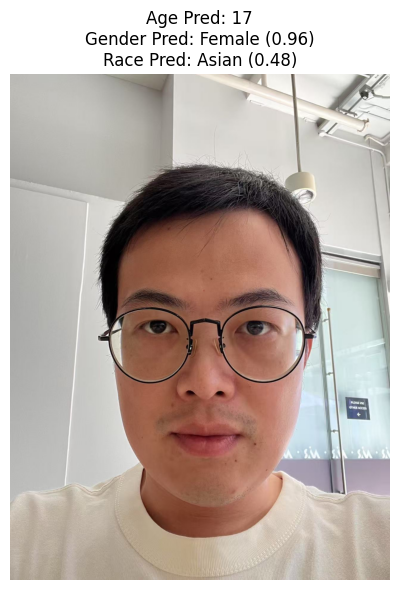

In [12]:
# Predict image from directory
def predict_and_display(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (300, 300))
    image = preprocess_input(image)
    image = tf.expand_dims(image, axis=0)

    # model = tf.keras.models.load_model("../models/efficientnet_v2s_dev.h5")
    # model = tf.keras.models.load_model("../models/efficientnet_v2s_dev_0714.h5")
    model = tf.keras.models.load_model("../model_development/best_efficientnetv2s.h5")
    age_pred, gender_pred, race_pred = model.predict(image)
    age_pred = int(age_pred[0][0])

    raw_gender_pred = gender_pred[0][0]
    gender_pred = "Male" if raw_gender_pred < 0.5 else "Female"
    gender_confidence = 1 - raw_gender_pred if gender_pred == "Male" else raw_gender_pred

    race_labels = ["White", "Black", "Asian", "Indian", "Others"]
    race_pred_label = race_labels[np.argmax(race_pred[0])]
    race_confidence = np.max(race_pred[0])

    # Load the original image for display
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Plotting the result
    plt.figure(figsize=(6, 6))
    plt.imshow(original_image)
    plt.axis("off")
    plt.title(f"Age Pred: {age_pred}\nGender Pred: {gender_pred} ({gender_confidence:.2f})\nRace Pred: {race_pred_label} ({race_confidence:.2f})")
    plt.tight_layout()
    plt.show()

# Predict and display the result
predict_and_display('../data_test/YRJ.jpg')